In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/bruno/.virtualenvs/metodos-tp3/bin/python (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/bruno/Documents/UBA/Metodos_númericos/metodos-tp3
-- Configuring done
-- Generating done
-- Build files hav

In [3]:
import pandas as pd
import numpy as np
#para la remoción de los outliers
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/bruno/Documents/UBA/Metodos_númericos/metodos-tp3/notebooks
Python 3.8.2


In [15]:
df = pd.read_csv('../data/train.csv')
#df = df [:10000]

In [16]:
df_indices_seg = df[["provincia","fecha"]]
df_indices_seg = df_indices_seg[(~df_indices_seg.isnull()).all(axis=1)]

print (df_indices_seg.count())

provincia    239845
fecha        239845
dtype: int64


In [17]:
#PERCEPCION SOBRE LA SEGURIDAD 
#marzo abril del 2012
percepcion_2012 = [46.5,51.6,24.4,44.6,74.6,70.8,37.9,82.7,70.8,81.8,54.1,74.4,49.2,61.5,84.5,76.0,81.2,72.9,86.7,60.7,57.1,29.4,59.9,60.0,77.4,42.4,71.2,82.9,40.1,70.0,19.2,80.5]

#marzo abril 2013 el problema es que este es sobre seguridad publica 
percepcion_2013=[45.4,46.4,69.2,40.2,16.9,28.2,45.7,18.5,26.2,19.5,37.9,9.6,39.3,23.3,8.3,16.5,12.5,42.6,19.6,31.1,32.1,55.9,27.7,19.3,21.4,47.3,15.0,13.5,45.8,22.0,67.0,14.6]

#marzo abril 2014 el problema es que este es sobre seguridad publica 
percepcion_2014=[48.2,41.5,59.0,38.7,19.9,41.7,36.0,22.2,22.1,23.6,31.8,18.9,31.5,31.0,6.4,16.3,10.6,47.1,25.6,20.6,34.0,59.3,30.4,24.9,26.5,41.6,13.2,13.4,36.6,16.9,69.6,18.5]

#marzo abril 2015 este esta hecho con un intervalo de confianza del 90% el formato es (lim inf, lim sup)
percepcion_2015_con_limites=[(62.2,67.1),(55.6,59.7),(59.1,63.1),(60.8,65.8),(62.1,66.4),(65.2,69.0),(65.7,69.6),(69.7,73.6),(48.6,53.7),(64.6,68.5),(47.5,52.6),(56.5,61.5),(54.5,59.5),(58.1,62.4),(31.5,36.0),(62.0,65.6),(43.6,48.0),(71.0,75.8),(57.9,61.7),(59.6,64.8),(54.2,57.9),(54.2,58.6),(54.6,59.0),(60.8,65.8),(66.2,69.9),(55.7,61.4),(35.9,40.3),(57.2,61.0),(50.5,55.3),(55.0,59.0),(64.4,68.4),(59.4,64.7)]
percepcion_2015 = []
for t in percepcion_2015_con_limites :
    percepcion_2015.append((t[0]+t[1])/2)
    
#marzo abril 2016 este esta hecho con un intervalo de confianza del 90% el formato es (lim inf, lim sup)
percepcion_2016_con_limites = [(58.4,63.6),(54.2,58.3),(66.5,70.1),(60.1,64.3),(68.6,72.4),(52.7,56.4),(63.5,67.2),(69.2,73.6),(40.4,45.4),(70.2,73.5),(49.5,54.6),(56.6,61.3),(56.4,61.1),(54.7,59.2),(30.0,34.1),(64.0,68.2),(43.6,48.2),(75.7,79.4),(59.2,63.2),(62.0,66.9),(46.6,50.4),(50.9,55.2),(53.7,57.9),(60.4,66.2),(69.7,73.3),(56.6,62.1),(33.7,38.0),(56.5,60.3),(54.3,58.5),(53.1,57.3),(64.4,68.0),(58.3,63.5)]

percepcion_2016 = []
for t in percepcion_2016_con_limites :
    percepcion_2016.append((t[0]+t[1])/2)

#estados
estados_fed = ["Aguascalientes","Baja California Norte","Baja California Sur","Campeche","Coahuila","Colima","Chiapas","Chihuahua","Distrito Federal","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","Edo. de México","Michoacán","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz","Yucatán","Zacatecas"]



In [18]:
lista = []
percepcion_seguridad = []

for index, row in df_indices_seg.iterrows():
    lista.append((row["provincia"],row["fecha"]))

for i in range(len(lista)) :
    if("2012" in lista[i][1]) :
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                percepcion_seguridad.append(percepcion_2012[j])
                break
                
    elif("2013" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                percepcion_seguridad.append(percepcion_2013[j])
                break
        #agrego los datos del periodo de 2013 segun la ciudad
    elif("2014" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                percepcion_seguridad.append(percepcion_2014[j])
                break
                
    elif("2015" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                percepcion_seguridad.append(percepcion_2015[j])
                break
                
    elif("2016" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                percepcion_seguridad.append(percepcion_2016[j])
                break
                
print(len(percepcion_seguridad))

239845


In [20]:
df_indices_seg["percepcion_seguridad"] = percepcion_seguridad

In [21]:
#DATOS DE INFRACCIONES REGISTRADAS POR INTERVENCIONES DE LA POLICIA POR ESTADO 
#2012
infracciones_2012 = [ 4474, 5046, 6208, 6907, 2079, 6008, 7918, 7942,1046967,  878, 5137, 3635, 38833, 2982, 33949, 11528, 4416, 16840, 8141, 8081,  835, 3190, 4403, 15979,  455,  649, 5025, 1701, 2934, 11810, 19653,  130]

#2013 
infracciones_2013=[ 19985, 4618, 9423, 19957, 1494, 6011, 11319, 4797,1200784,  626,1329, 6263, 43471, 2793, 31583, 9257, 4455, 3180, 15841, 11090, 8395, 4392, 3646, 19562, 3654, 1732, 4854, 22072, 1753, 12056, 20826,  140]

#2014
infracciones_2014=[ 19617, 4232,  946, 26561, 12621, 4727, 9187, 5278, 592135, 5525, 1090, 4013, 38962, 2391, 36331, 9994, 6335,  902, 10078, 8374, 4389, 1206, 4077, 26382,  701, 2871, 4011, 25356, 2310, 14498, 22606,  175]

#2015
infracciones_2015=[ 19729, 3106, 1188, 26980, 22375, 6388, 8816, 6208, 198094, 16017, 1174, 3895, 32931, 3569, 25357, 3920, 10969, 2148, 10618, 5931, 1822, 1708, 3404, 22169,  735, 1833, 6719, 29556, 3810, 16538, 264264,  216]

#2016
infracciones_2016 = [ 69886, 2652,  796, 21101, 19304, 4547, 8799, 8525, 205320, 23752, 93899, 13552, 5548, 3459, 34539, 44615, 29294,  476, 9082, 6809, 1649, 36824, 12806, 20372,  707, 1365, 10846, 34944, 3945, 17176, 260592,  224]

#estados
estados_fed = ["Aguascalientes","Baja California Norte","Baja California Sur","Campeche","Coahuila","Colima","Chiapas","Chihuahua","Distrito Federal","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","Edo. de México","Michoacán","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz","Yucatán","Zacatecas"]


In [22]:
lista = []
indice_infracciones = []

for index, row in df_indices_seg.iterrows():
    lista.append((row["provincia"],row["fecha"]))

for i in range(len(lista)) :
    if("2012" in lista[i][1]) :
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                indice_infracciones.append(infracciones_2012[j])
                break
                
    elif("2013" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                indice_infracciones.append(infracciones_2013[j])
                break
        #agrego los datos del periodo de 2013 segun la ciudad
    elif("2014" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                indice_infracciones.append(infracciones_2014[j])
                break
                
    elif("2015" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                indice_infracciones.append(infracciones_2015[j])
                break
                
    elif("2016" in lista[i][1]) :
        
        for j in range(len(estados_fed)):
            if estados_fed[j].lower() in lista[i][0].lower() :
                indice_infracciones.append(infracciones_2016[j])
                break
                
print(len(indice_infracciones))

239845


In [23]:
df_indices_seg["indice_infracciones"] = indice_infracciones

In [25]:
print(df_indices_seg["indice_infracciones"])

0          198094
1         1200784
2            3569
3           33949
4            3459
           ...   
239995      25357
239996      36331
239997     198094
239998     592135
239999     198094
Name: indice_infracciones, Length: 239845, dtype: int64


Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'tipodepropiedad'],
      dtype='object')
                                  id  antiguedad  habitaciones   garages  \
id                          1.000000    0.002208     -0.002074 -0.001373   
antiguedad                  0.002208    1.000000      0.140843 -0.054674   
habitaciones               -0.002074    0.140843      1.000000  0.190828   
garages                    -0.001373   -0.054674      0.190828  1.000000   
banos                      -0.001697   -0.062289      0.424193  0.368593   
metroscubiertos             0.000374    0.063045      0.462552  0.349295   
metrostotales               0.001390    0.017933      0.309898  0.220072   
idzona                      0.003273    0.030103     -0.043837 -0.023460   
lat                         0.

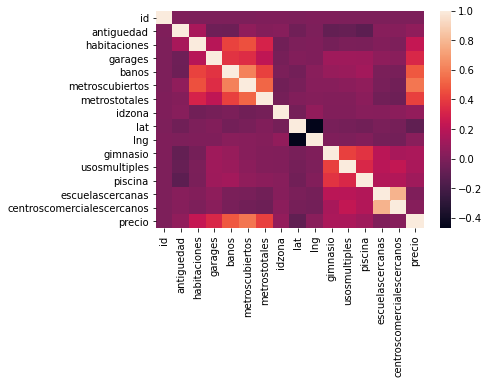

In [4]:
df = pd.read_csv('../data/train.csv')

numeric_cols = df.select_dtypes(include=[np.number]).columns.append(pd.Index(["tipodepropiedad"]))
print(numeric_cols)
df = df[numeric_cols]
df = df[df['tipodepropiedad'].notnull()]

df = df.fillna(df.median())
df = df.drop(columns=["tipodepropiedad"])

# Correlación entre variables
correlation = df.corr()

print(correlation)

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

#df = df[['metroscubiertos', "piscina", "usosmultiples", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]]

# asumiendo una distribucion normal de los datos podemos usar z-score para recortar datos 
# se observa que el corte standar utilizado para encontrar outliers es para |z-scores|<3

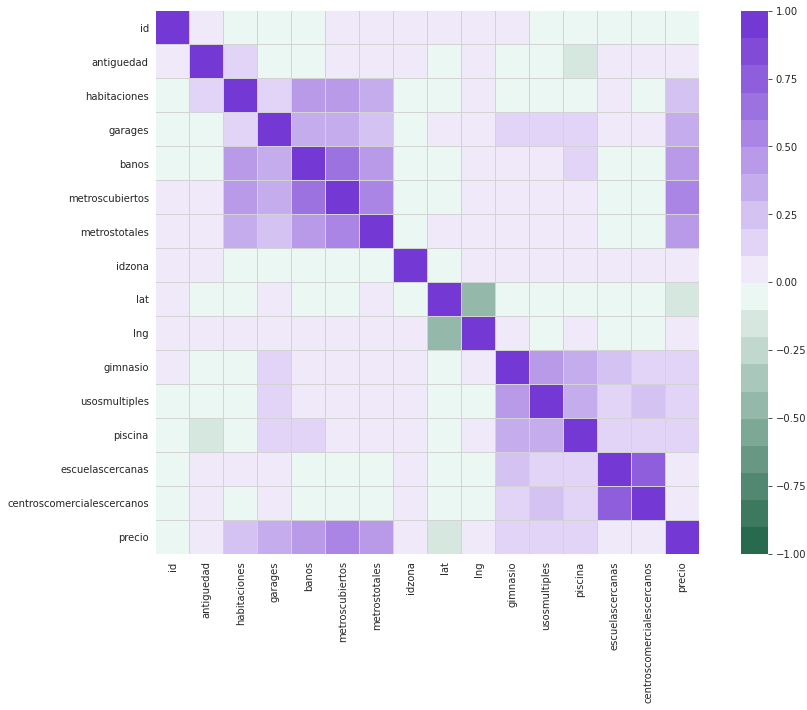

In [68]:
corr = correlation
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
paleta = sns.diverging_palette(150, 275, s=80, l=40, n=20)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, vmax=1, vmin=-1, square=True, linewidths=.01, linecolor='lightgray', cmap=paleta)

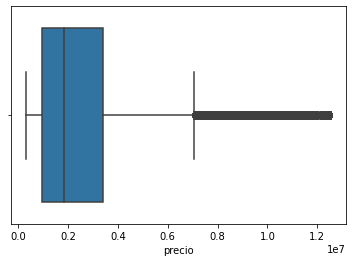

In [42]:
sns.boxplot(x=df['precio'])

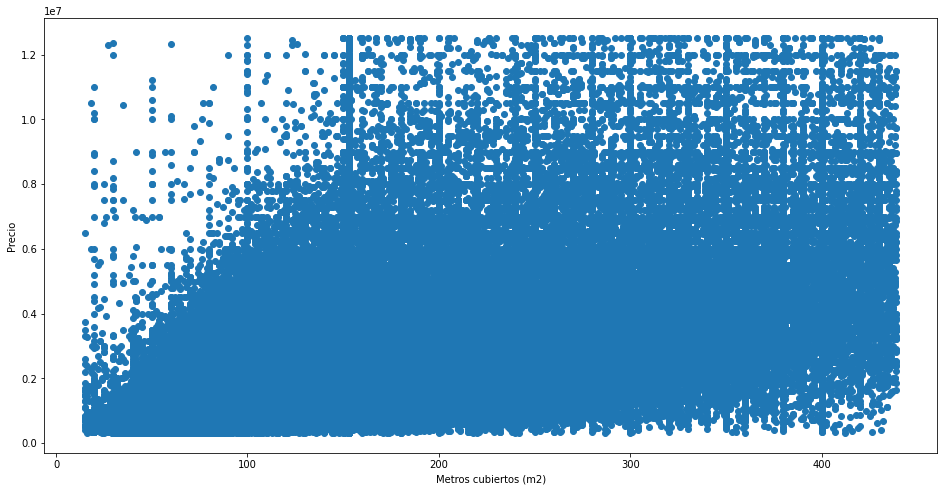

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['metroscubiertos'], df['precio'])
ax.set_xlabel('Metros cubiertos (m2)')
ax.set_ylabel('Precio')
plt.show()

In [18]:
features = ['metroscubiertos', "piscina", "usosmultiples", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]

def removeOutliers(df, features, target):
    df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    
    x_zscore = df_zscore[features].values
    y_zscore = df_zscore[target].values

    x_zscore = x_zscore.reshape(len(x_zscore),len(features))
    y_zscore = y_zscore.reshape(len(y_zscore),len(target))
    
    x = pd.DataFrame(data=x_zscore, columns=features)
    y = pd.DataFrame(data=y_zscore, columns=target)
    
    return x, y

print(removeOutliers(df, features, ["precio"]))

(        metroscubiertos  piscina  usosmultiples  gimnasio  escuelascercanas  \
0                  80.0      0.0            0.0       0.0               0.0   
1                 268.0      0.0            0.0       0.0               1.0   
2                 144.0      0.0            0.0       0.0               0.0   
3                  63.0      0.0            0.0       0.0               1.0   
4                  95.0      0.0            0.0       0.0               0.0   
...                 ...      ...            ...       ...               ...   
181606            150.0      0.0            0.0       0.0               0.0   
181607            160.0      0.0            0.0       0.0               0.0   
181608             67.0      0.0            0.0       0.0               0.0   
181609            200.0      0.0            0.0       0.0               1.0   
181610            149.0      0.0            0.0       0.0               0.0   

        centroscomercialescercanos  habitaciones  

In [5]:
z = np.abs(stats.zscore(df))
print(z)

[[1.20196843 0.29231424 1.06678575 ... 0.89403308 0.81074109 0.11980672]
 [1.11395717 0.28060534 0.10363101 ... 1.11852685 1.23343939 0.49666598]
 [1.13138417 0.29231424 0.10363101 ... 0.89403308 0.81074109 0.61828087]
 ...
 [0.20818161 1.42644449 1.06678575 ... 0.89403308 0.81074109 0.40375374]
 [0.03578979 1.42644449 1.27404777 ... 1.11852685 1.23343939 0.16682754]
 [0.32330956 0.7506499  0.10363101 ... 0.89403308 0.81074109 0.51989404]]


In [6]:
df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# df_std[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]

In [7]:
x = df[['metroscubiertos', "piscina", "usosmultiples", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]].values
x_zscore = df_zscore[['metroscubiertos', "piscina", "usosmultiples", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]].values

In [8]:
y = df['precio'].values
y_zscore = df_zscore['precio'].values

In [9]:
x = x.reshape(len(x),9)
y = y.reshape(len(y),1)

x_zscore = x_zscore.reshape(len(x_zscore),9)
y_zscore = y_zscore.reshape(len(y_zscore),1)

In [10]:
print(x.shape)
print(y.shape)

print(x_zscore.shape)
print(y_zscore.shape)


(239954, 9)
(239954, 1)
(181611, 9)
(181611, 1)


In [14]:
print(np.linalg.inv(x.T @ x) @ (x.T @ y))

[[  10488.17075966]
 [ -20349.83177626]
 [ 507378.85472612]
 [ 833252.70677691]
 [-421053.59441536]
 [ 404680.0815836 ]
 [-219529.06393738]
 [ 239740.65453497]
 [ 441872.72043382]]


In [15]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

linear_regressor = LinearRegression()
linear_robust = LinearRegression()

#linear_regressor = metnum.LinearRegression() # CHEQUEADO
#linear_robust = metnum.LinearRegression() # CHEQUEADO

linear_regressor.fit(x,y)
linear_robust.fit(x_zscore,y_zscore)

LinearRegression()

In [16]:
df['prediction'] = linear_regressor.predict(x)
prediction = linear_regressor.predict(x)

df_zscore['prediction'] = linear_robust.predict(x_zscore)
prediction_robust = linear_robust.predict(x_zscore)

<ipython-input-16-2a5057a3fa07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['prediction'] = linear_robust.predict(x_zscore)


In [17]:
error = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y, prediction)))
print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))

error_robust = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y_zscore, prediction_robust)))
print("MAE: %f" % (error.meanAbsoluteError(y_zscore, prediction_robust)))
print("RMSE: %f" % (error.rootMeanSquareError(y_zscore, prediction_robust)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y_zscore, prediction_robust)))

MSE: 2810348692143.376465
MAE: 1135799.826058
RMSE: 1676409.464344
RMSLE: nan
MSE: 1725119217078.918213
MAE: 916179.737736
RMSE: 1313437.938039
RMSLE: nan


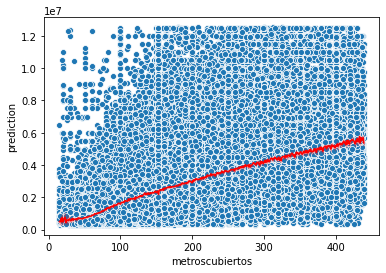

In [18]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')

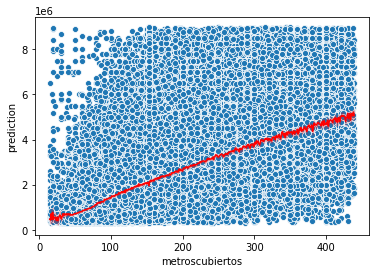

In [19]:
sns.scatterplot(data=df_zscore, x='metroscubiertos', y='precio')
sns.lineplot(data=df_zscore, x='metroscubiertos', y='prediction', color='red')